<a href="https://colab.research.google.com/github/doudi0101/Google_AI/blob/main/Sentiment_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Sentiment Analysis on US Airline Reviews

## 0.Dependencies

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM,Dense, Dropout, SpatialDropout1D
from tensorflow.keras.layers import Embedding

## 1.Lecture et exploration des données

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/yxccxxx/Twitter-Airline-Sentiment-Analysis/master/Tweets.csv')

In [3]:
df.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


In [4]:
df.columns

Index(['tweet_id', 'airline_sentiment', 'airline_sentiment_confidence',
       'negativereason', 'negativereason_confidence', 'airline',
       'airline_sentiment_gold', 'name', 'negativereason_gold',
       'retweet_count', 'text', 'tweet_coord', 'tweet_created',
       'tweet_location', 'user_timezone'],
      dtype='object')

## 2.Extraction et encodage des données

In [5]:
tweet_df = df[['text','airline_sentiment']]
print(tweet_df.shape)  # (# de lignes, # de colonnes)
tweet_df.head(5)

(14640, 2)


,text,airline_sentiment
0,@VirginAmerica What @dhepburn said.,neutral
1,@VirginAmerica plus you've added commercials t...,positive
2,@VirginAmerica I didn't today... Must mean I n...,neutral
3,@VirginAmerica it's really aggressive to blast...,negative
4,@VirginAmerica and it's a really big bad thing...,negative


In [6]:
tweet_df = tweet_df[tweet_df['airline_sentiment'] != 'neutral'] # extraction des sentiments différents de neutre
print(tweet_df.shape)
tweet_df.head(5)

(11541, 2)


,text,airline_sentiment
1,@VirginAmerica plus you've added commercials t...,positive
3,@VirginAmerica it's really aggressive to blast...,negative
4,@VirginAmerica and it's a really big bad thing...,negative
5,@VirginAmerica seriously would pay $30 a fligh...,negative
6,"@VirginAmerica yes, nearly every time I fly VX...",positive


In [7]:
tweet_df["airline_sentiment"].value_counts()

negative    9178
positive    2363
Name: airline_sentiment, dtype: int64

Encoder la variable cible comme un type énuméré ou une variable catégorielle

In [8]:
sentiment_label = tweet_df.airline_sentiment.factorize()
sentiment_label 

(array([0, 1, 1, ..., 0, 1, 1]),
 Index(['positive', 'negative'], dtype='object'))

Prendre les valeurs de la colonne "text"

In [9]:
tweet = tweet_df.text.values

## 3.Traitement du texte

Tokenize : Cette classe permet de vectoriser un corpus de texte, en transformant chaque texte en une séquence d'entiers (chaque entier étant l'indice d'un token dans un dictionnaire)

In [10]:
tokenizer = Tokenizer(num_words=5000) 
tokenizer.fit_on_texts(tweet)
vocab_size = len(tokenizer.word_index) + 1 
encoded_docs = tokenizer.texts_to_sequences(tweet) # chaque tweet encodé
padded_sequence = pad_sequences(encoded_docs, maxlen=200)

In [11]:
print(tweet[0])
print(encoded_docs[0])

@VirginAmerica plus you've added commercials to the experience... tacky.
[103, 575, 530, 1287, 2416, 1, 2, 177]


In [12]:
print(padded_sequence[0])

[   0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0  103  575  530 1287
 2416 

In [13]:
print(padded_sequence)

[[   0    0    0 ...    1    2  177]
 [   0    0    0 ...   25  482 2417]
 [   0    0    0 ...  483   86   21]
 ...
 [   0    0    0 ...    8    1  480]
 [   0    0    0 ... 1682   45  945]
 [   0    0    0 ...  144   11 2325]]


model.add(tf.keras.layers.Embedding(vocab_size, embedding_vector_length , input_length=200))

Le modèle prendra en entrée une matrice d'entiers de taille (batch, input_length)

le plus grand entier (i.e. l'index du mot) dans l'entrée ne devrait pas être plus grand que la taille du vocabulaire. 

## 4.Construction et entraînement du modèle

In [14]:
embedding_vector_length = 32
model = Sequential() 
model.add(Embedding(vocab_size, embedding_vector_length, input_length=200) )
model.add(SpatialDropout1D(0.25))
model.add(LSTM(50, dropout=0.5, recurrent_dropout=0.5))
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid')) 
model.compile(loss='binary_crossentropy',optimizer='adam', metrics=['accuracy'])  
print(model.summary()) 

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 200, 32)           423488    
                                                                 
 spatial_dropout1d (SpatialD  (None, 200, 32)          0         
 ropout1D)                                                       
                                                                 
 lstm (LSTM)                 (None, 50)                16600     
                                                                 
 dropout (Dropout)           (None, 50)                0         
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 440,139
Trainable params: 440,139
Non-trainable params: 0
__________________________________________________

In [15]:
history = model.fit(padded_sequence,sentiment_label[0],validation_split=0.2, epochs=10, batch_size=32)

Epoch 1/10
289/289 [==============================] - 59s 197ms/step - loss: 0.3972 - accuracy: 0.8320 - val_loss: 0.2077 - val_accuracy: 0.9168
Epoch 2/10
289/289 [==============================] - 48s 166ms/step - loss: 0.2230 - accuracy: 0.9150 - val_loss: 0.1638 - val_accuracy: 0.9407
Epoch 3/10
289/289 [==============================] - 49s 170ms/step - loss: 0.1618 - accuracy: 0.9405 - val_loss: 0.1686 - val_accuracy: 0.9446
Epoch 4/10
289/289 [==============================] - 48s 168ms/step - loss: 0.1404 - accuracy: 0.9468 - val_loss: 0.1670 - val_accuracy: 0.9420
Epoch 5/10
289/289 [==============================] - 48s 167ms/step - loss: 0.1168 - accuracy: 0.9570 - val_loss: 0.1688 - val_accuracy: 0.9446
Epoch 6/10
289/289 [==============================] - 48s 167ms/step - loss: 0.0999 - accuracy: 0.9624 - val_loss: 0.1753 - val_accuracy: 0.9459
Epoch 7/10
289/289 [==============================] - 48s 167ms/step - loss: 0.0871 - accuracy: 0.9688 - val_loss: 0.1894 - val_ac

## 5.Graphes accuracy et pertes pour les données d'entrainement et de validation (test)

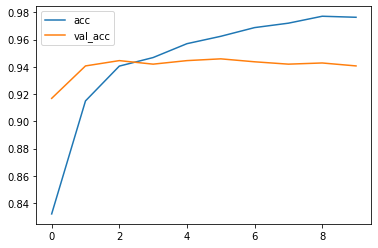

<Figure size 432x288 with 0 Axes>

In [16]:
plt.plot(history.history['accuracy'], label='acc')
plt.plot(history.history['val_accuracy'], label='val_acc')
plt.legend()
plt.show()
plt.savefig("Accuracy plot.jpg")

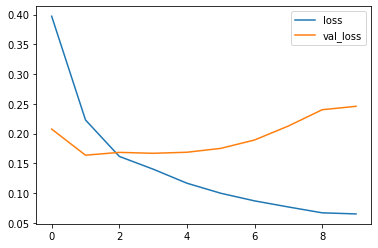

<Figure size 432x288 with 0 Axes>

In [17]:
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.legend()
plt.show()
plt.savefig("Loss plot.jpg")

## 6.Prédictions

faites des prédictions sur vos propres mots 

In [18]:
def predict_sentiment(text):
    tw = tokenizer.texts_to_sequences([text])
    tw = pad_sequences(tw,maxlen=200)
    prediction = int(model.predict(tw).round().item())
    print("Predicted label: ", sentiment_label[1][prediction])

In [19]:
test_sentence1 = "I enjoyed my journey on this flight."
predict_sentiment(test_sentence1)

Predicted label:  positive


In [20]:
test_sentence2 = "This is the worst flight experience of my life!"
predict_sentiment(test_sentence2)

Predicted label:  negative


## 7.Tout Refaire avec le texte traduit

ici nous n'avons traduit que les 1000 premiers tweets car la traduction prend beaucoup de temps

In [21]:
!pip install googletrans==3.1.0a0
from googletrans import Translator

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [22]:
translator = Translator()

In [23]:
tweet_df['texte_traduit'] = tweet_df['text'].head(2).apply(translator.translate, src='en', dest='fr')

In [24]:
tweet_df['texte_traduit'].head()

1    Translated(src=en, dest=fr, text=@VirginAmeric...
3    Translated(src=en, dest=fr, text=@VirginAmeric...
4                                                  NaN
5                                                  NaN
6                                                  NaN
Name: texte_traduit, dtype: object

In [25]:
tweet_df.shape

(11541, 3)

In [26]:
tweet_df['texte_traduit'] = tweet_df['text'].head(1000).apply(lambda x: translator.translate(x, src='en', dest='fr').text)
tweet_df['texte_traduit'] = tweet_df['texte_traduit'].head(1000)

In [27]:
tweet_df = tweet_df[['airline_sentiment','texte_traduit']].head(1000)

In [28]:
tweet_df['texte_traduit'].head(10)

1     @VirginAmerica plus vous avez ajouté des publi...
3     @VirginAmerica c'est vraiment agressif de fair...
4     @VirginAmerica et c'est une très mauvaise chos...
5     @VirginAmerica paierait sérieusement 30 $ par ...
6     @VirginAmerica oui, presque à chaque fois que ...
8     @virginamerica Eh bien, je ne l'ai pas fait… m...
9     @VirginAmerica c'était incroyable et est arriv...
11    @VirginAmerica I <3 jolis graphismes. tellemen...
12    @VirginAmerica C'est une très bonne affaire ! ...
13    @VirginAmerica @virginmedia Je vole à nouveau ...
Name: texte_traduit, dtype: object

In [29]:
tweet_df.head()

,airline_sentiment,texte_traduit
1,positive,@VirginAmerica plus vous avez ajouté des publi...
3,negative,@VirginAmerica c'est vraiment agressif de fair...
4,negative,@VirginAmerica et c'est une très mauvaise chos...
5,negative,@VirginAmerica paierait sérieusement 30 $ par ...
6,positive,"@VirginAmerica oui, presque à chaque fois que ..."


In [30]:
tweet_df.shape

(1000, 2)

In [31]:
sentiment_label = tweet_df.airline_sentiment.factorize()

In [32]:
tweet = tweet_df.texte_traduit.values

In [33]:
tokenizer = Tokenizer(num_words=5000) 
tokenizer.fit_on_texts(tweet)
vocab_size = len(tokenizer.word_index) + 1 
encoded_docs = tokenizer.texts_to_sequences(tweet) # chaque tweet encodé
padded_sequence = pad_sequences(encoded_docs, maxlen=200)

embedding_vector_length = 32
model = Sequential() 
model.add(Embedding(vocab_size, embedding_vector_length, input_length=200) )
model.add(SpatialDropout1D(0.25))
model.add(LSTM(50, dropout=0.5, recurrent_dropout=0.5))
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid')) 
model.compile(loss='binary_crossentropy',optimizer='adam', metrics=['accuracy'])  
print(model.summary()) 


history = model.fit(padded_sequence,sentiment_label[0],validation_split=0.2, epochs=10, batch_size=32)

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 200, 32)           128544    
                                                                 
 spatial_dropout1d_1 (Spatia  (None, 200, 32)          0         
 lDropout1D)                                                     
                                                                 
 lstm_1 (LSTM)               (None, 50)                16600     
                                                                 
 dropout_1 (Dropout)         (None, 50)                0         
                                                                 
 dense_1 (Dense)             (None, 1)                 51        
                                                                 
Total params: 145,195
Trainable params: 145,195
Non-trainable params: 0
________________________________________________

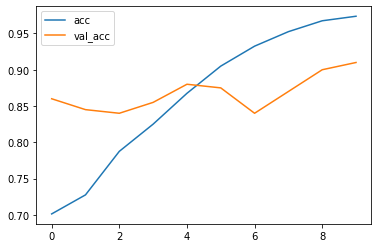

<Figure size 432x288 with 0 Axes>

In [34]:
plt.plot(history.history['accuracy'], label='acc')
plt.plot(history.history['val_accuracy'], label='val_acc')
plt.legend()
plt.show()
plt.savefig("Accuracy plot.jpg")

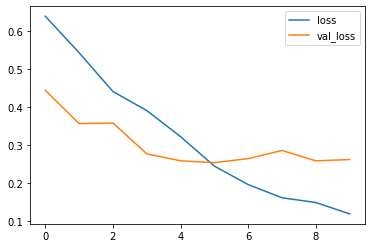

<Figure size 432x288 with 0 Axes>

In [35]:
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.legend()
plt.show()
plt.savefig("Loss plot.jpg")

In [36]:
test_sentence1 = "j'ai bien aimé ce vol"
predict_sentiment(test_sentence1)

Predicted label:  positive


In [42]:
test_sentence1 = "je n'ai pas du tout aimé, c'est mauvais"
predict_sentiment(test_sentence1)

Predicted label:  negative
